# Выполнил Макутин Е.А.

# 1 Библиотеки

##1.1 Импорт

In [ ]:
"""Импорт базовых модулей"""
import math
import os
import gc
import random
from pprint import pprint
import numpy as np               # Для линейной алгебры
import pandas as pd              # Для работы с данными
import matplotlib.pyplot as plt  # Для 2D визуализации
import seaborn as sns

# Настройка Warnings
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from scipy import stats                         # Для статистики
from scipy.stats.contingency import association

"""Plotly визуализация"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
  

"""scikit-learn модули"""
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import chi2
from sklearn.metrics import matthews_corrcoef

import multiprocessing
import pickle, joblib


from IPython.display import Markdown, display

sns.set_style('darkgrid')

init_notebook_mode(connected=True)

%matplotlib inline

##1.2 Настройки

In [ ]:
left_padding = 40
SEED = 80

def seed_everything(seed=44):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

In [ ]:
# Настройки для текста
class text:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

##1.3 Data (Данные)

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")
df.columns = ["фиксированная кислотность", "летучая кислотность", "лимонная кислота", "остаточный сахар", "хлориды", "свободный диоксид серы", "общий диоксид серы", "плотность", "pH", "сульфаты", "спирт", "качество"]
df.head(5)

,фиксированная кислотность,летучая кислотность,лимонная кислота,остаточный сахар,хлориды,свободный диоксид серы,общий диоксид серы,плотность,pH,сульфаты,спирт,качество
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Размерность датасета
print(f"Размерность датасета: {text.BOLD}{df.shape[0]}{text.END} rows, {text.BOLD}{df.shape[1]}{text.END} columns")

Размерность датасета: 1599 rows, 12 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   фиксированная кислотность  1599 non-null   float64
 1   летучая кислотность        1599 non-null   float64
 2   лимонная кислота           1599 non-null   float64
 3   остаточный сахар           1599 non-null   float64
 4   хлориды                    1599 non-null   float64
 5   свободный диоксид серы     1599 non-null   float64
 6   общий диоксид серы         1599 non-null   float64
 7   плотность                  1599 non-null   float64
 8   pH                         1599 non-null   float64
 9   сульфаты                   1599 non-null   float64
 10  спирт                      1599 non-null   float64
 11  качество                   1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 2 Подготовка данных

##2.1 Проверка на дублированные строки

In [ ]:
all_rows = len(df.index)
duplicate_rows = len(df.drop_duplicates().index)
print('Известные наблюдения: {} \ Уникальные наблюдения: {}'.format(all_rows, duplicate_rows))

print ("Найдено дубликатов: {}".format(all_rows - duplicate_rows))

Известные наблюдения: 1599 \ Уникальные наблюдения: 1359
Найдено дубликатов: 240


In [ ]:
# Показать дубликаты (пример)
duplicate = df[df.duplicated()]
duplicate

,фиксированная кислотность,летучая кислотность,лимонная кислота,остаточный сахар,хлориды,свободный диоксид серы,общий диоксид серы,плотность,pH,сульфаты,спирт,качество
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
# Данные без дубликатов
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,фиксированная кислотность,летучая кислотность,лимонная кислота,остаточный сахар,хлориды,свободный диоксид серы,общий диоксид серы,плотность,pH,сульфаты,спирт,качество
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<a id='3.2'></a>
## 3.2 Описание категориальных признаков

In [ ]:
df_no_duplicates.describe().T

,count,mean,std,min,25%,50%,75%,max
фиксированная кислотность,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
летучая кислотность,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
лимонная кислота,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
остаточный сахар,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
хлориды,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
свободный диоксид серы,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
общий диоксид серы,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
плотность,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
сульфаты,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


<a id='3.3'></a>
## 3.3 Уникальные значения для всех столбцов

In [ ]:
print(f"{text.BOLD}Уникальные значения по признакам{text.END}")
for column in df_no_duplicates.columns:
    uniq = np.unique(df_no_duplicates[column])
    print(column.ljust(left_padding),len(uniq))

Уникальные значения по признакам
фиксированная кислотность                96
летучая кислотность                      143
лимонная кислота                         80
остаточный сахар                         91
хлориды                                  153
свободный диоксид серы                   60
общий диоксид серы                       144
плотность                                436
pH                                       89
сульфаты                                 96
спирт                                    65
качество                                 6


# 4 Подготовка сырых данных

##4.1 Отсутствующие значения

In [ ]:
df_no_duplicates.isna().sum()

фиксированная кислотность    0
летучая кислотность          0
лимонная кислота             0
остаточный сахар             0
хлориды                      0
свободный диоксид серы       0
общий диоксид серы           0
плотность                    0
pH                           0
сульфаты                     0
спирт                        0
качество                     0
dtype: int64

##4.2 Поиск простых закономерностей

In [ ]:
# Зависимость остаточного сахара от кол-ва спирта
print(df.loc[:, ["остаточный сахар", "спирт"]].head(10))
cor_1 = df_no_duplicates["остаточный сахар"].corr(df["спирт"], method= 'pearson')
print("\n")
print(f"Корреляция = {text.BOLD}{cor_1}{text.END}")

   остаточный сахар  спирт
0               1.9    9.4
1               2.6    9.8
2               2.3    9.8
3               1.9    9.8
4               1.9    9.4
5               1.8    9.4
6               1.6    9.4
7               1.2   10.0
8               2.0    9.5
9               6.1   10.5


Корреляция = 0.06328108224993208


In [ ]:
# Зависимость качества вина от остаточного сахара
print(df.loc[:, ["качество", "остаточный сахар"]].head(10))
cor_2 = df_no_duplicates["качество"].corr(df["остаточный сахар"], method= 'spearman')
print("\n")
print(f"Корреляция = {text.BOLD}{cor_2}{text.END}")

   качество  остаточный сахар
0         5               1.9
1         5               2.6
2         5               2.3
3         6               1.9
4         5               1.9
5         5               1.8
6         5               1.6
7         7               1.2
8         7               2.0
9         5               6.1


Корреляция = 0.025749202162012062


# 5 Провести одномерный анализ данных

##5.1 K2-тест Д-Агостино

В данных все значения имеют числовые признаки.
Буду рассматривать и проводить анализ по столбцам слева направо

**Проверка:**
1) Данные имеют нормальное распределение // распределиние по Гауссу;

2) Ненормальное распределение // выборка не имеет распределения по Гауссу

In [ ]:
# Вывожу всю таблицу для удобства
df

,фиксированная кислотность,летучая кислотность,лимонная кислота,остаточный сахар,хлориды,свободный диоксид серы,общий диоксид серы,плотность,pH,сульфаты,спирт,качество
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Фиксированная кислотность**

In [ ]:
stat, p = stats.normaltest(df['фиксированная кислотность'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=224.53088, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Летучая кислотность**

In [ ]:
stat, p = stats.normaltest(df['летучая кислотность'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=143.41934, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Лимонная кислота**

In [ ]:
stat, p = stats.normaltest(df['лимонная кислота'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=152.03921, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Остаточный сахар**

In [ ]:
stat, p = stats.normaltest(df['остаточный сахар'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=1520.32397, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Хлориды**

In [ ]:
stat, p = stats.normaltest(df['хлориды'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=1783.10592, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Свободный диоксид серы**

In [ ]:
stat, p = stats.normaltest(df['свободный диоксид серы'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=342.25915, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Общий диоксид серы**

In [ ]:
stat, p = stats.normaltest(df['общий диоксид серы'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=487.42726, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Плотность**

In [ ]:
stat, p = stats.normaltest(df['плотность'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=30.70775, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**pH**

In [ ]:
stat, p = stats.normaltest(df['pH'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=33.68470, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Сульфаты**

In [ ]:
stat, p = stats.normaltest(df['сульфаты'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=906.89445, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Спирт**

In [ ]:
stat, p = stats.normaltest(df['спирт'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=154.17807, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Качество**

In [ ]:
stat, p = stats.normaltest(df['качество'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Выборка выглядит гауссовой (не удается отклонить H0)')
else:
    print('Выборка не выглядит гауссовой (отклоняем H0)')

Statistics=17.26240, p=0.000
Выборка не выглядит гауссовой (отклоняем H0)


**Вывод:** Все данные не подчиняются законам нормального распределения!

##5.2 Критерий Шапиро-Уилка

**Так как выборка < 5000, то можно оценить нормальность** 

**Фиксированная кислотность**

In [ ]:
shapiro_test = stats.shapiro(df["фиксированная кислотность"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 1.5255951637239901e-24. Это очень малая величина
Скорее всего в данных есть выбросы


**Летучая кислотность**

In [ ]:
shapiro_test = stats.shapiro(df["летучая кислотность"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 2.686806772838566e-16. Это очень малая величина
Скорее всего в данных есть выбросы


**Лимонная кислота**

In [ ]:
shapiro_test = stats.shapiro(df["лимонная кислота"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 1.0208196357632134e-21. Это очень малая величина
Скорее всего в данных есть выбросы


**Остаточный сахар**

In [ ]:
shapiro_test = stats.shapiro(df["остаточный сахар"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 0.0. Это очень малая величина
Скорее всего в данных есть выбросы


**Хлориды**

In [ ]:
shapiro_test = stats.shapiro(df["хлориды"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 0.0. Это очень малая величина
Скорее всего в данных есть выбросы


**Свободный диоксид серы**

In [ ]:
shapiro_test = stats.shapiro(df["свободный диоксид серы"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 7.6973984391279615e-31. Это очень малая величина
Скорее всего в данных есть выбросы


**Общий диоксид серы**

In [ ]:
shapiro_test = stats.shapiro(df["общий диоксид серы"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 3.5741436086741964e-34. Это очень малая величина
Скорее всего в данных есть выбросы


**Плотность**

In [ ]:
shapiro_test = stats.shapiro(df["плотность"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 1.9400959061499634e-08. Это очень малая величина
Скорее всего в данных есть выбросы


**pH**

In [ ]:
shapiro_test = stats.shapiro(df["pH"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 1.7136950418716879e-06. Это очень малая величина
Скорее всего в данных есть выбросы


**Сульфаты**

In [ ]:
shapiro_test = stats.shapiro(df["сульфаты"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 5.821617678881608e-38. Это очень малая величина
Скорее всего в данных есть выбросы


**Спирт**

In [ ]:
shapiro_test = stats.shapiro(df["спирт"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 6.643664824998876e-27. Это очень малая величина
Скорее всего в данных есть выбросы


**Качество**

In [ ]:
shapiro_test = stats.shapiro(df["качество"])
# Проверка значения p-value
if (shapiro_test.pvalue < 0.5):
  print("p-value = {}. Это очень малая величина\nСкорее всего в данных есть выбросы".format(shapiro_test.pvalue))
elif (shapiro_test.pvalue >= 0.75 and shapiro_test.pvalue <= 0.95):
  print("Можно считать нормальным распределением")
elif (shapiro_test.pvalue == 1.0):
  print("Выборка имеет нормальное распределение")

p-value = 9.504003839923922e-36. Это очень малая величина
Скорее всего в данных есть выбросы


**Вывод:** Все данные имеют выбросы, но также подтверждается тот факт, что они **не имеют нормальное распределение**! 

##5.3 Критерий Андерсона — Дарлинга

**Фиксированная кислотность**

In [ ]:
result = stats.anderson(df['фиксированная кислотность'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 28.143
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Летучая кислотность**

In [ ]:
result = stats.anderson(df['летучая кислотность'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 5.683
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Лимонная кислота**

In [ ]:
result = stats.anderson(df['лимонная кислота'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 17.542
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Остаточный сахар**

In [ ]:
result = stats.anderson(df['остаточный сахар'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 188.064
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Хлориды**

In [ ]:
result = stats.anderson(df['хлориды'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 210.449
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Свободный диоксид серы**

In [ ]:
result = stats.anderson(df['свободный диоксид серы'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 38.610
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Общий диоксид серы**

In [ ]:
result = stats.anderson(df['общий диоксид серы'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 52.489
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Плотность**

In [ ]:
result = stats.anderson(df['плотность'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 3.868
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**pH**

In [ ]:
result = stats.anderson(df['pH'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 1.864
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Сульфаты**

In [ ]:
result = stats.anderson(df['сульфаты'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 46.932
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Спирт**

In [ ]:
result = stats.anderson(df['спирт'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 34.917
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Качество**

In [ ]:
result = stats.anderson(df['качество'])

print('Statistic: %.3f' % result.statistic)

# Проходимся по уровням значимости и критическим значениям
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные имеют нормальное распределение')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не поддаются нормальному распределению')

Statistic: 110.633
Уровень значимости 15.00 % : критическое значение 0.575, данные не поддаются нормальному распределению
Уровень значимости 10.00 % : критическое значение 0.654, данные не поддаются нормальному распределению
Уровень значимости 5.00 % : критическое значение 0.785, данные не поддаются нормальному распределению
Уровень значимости 2.50 % : критическое значение 0.916, данные не поддаются нормальному распределению
Уровень значимости 1.00 % : критическое значение 1.089, данные не поддаются нормальному распределению


**Вывод:** Все данные **не поддаются нормальному распределению**! 

# 6 Одномерная визуализация

**Так как все данные не поддаются нормальному распределению, визуализацию произведу на примере значений**:

*columns = ["Фиксированная кислотность", "Летучая кислотность", "Лимонная кислота"]*

Вывожу данные для удобства

In [ ]:
df[["фиксированная кислотность", "летучая кислотность", "лимонная кислота"]]

,фиксированная кислотность,летучая кислотность,лимонная кислота
0,7.4,0.700,0.00
1,7.8,0.880,0.00
2,7.8,0.760,0.04
3,11.2,0.280,0.56
4,7.4,0.700,0.00
...,...,...,...
1594,6.2,0.600,0.08
1595,5.9,0.550,0.10
1596,6.3,0.510,0.13
1597,5.9,0.645,0.12


##6.1 Построение графиков

**Фиксированная кислотность**

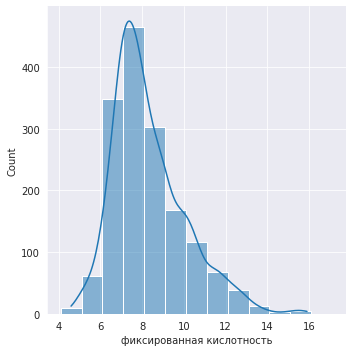

In [ ]:
sns.displot(df["фиксированная кислотность"], discrete = True, kde = True)

plt.show()

**Летучая кислотность**

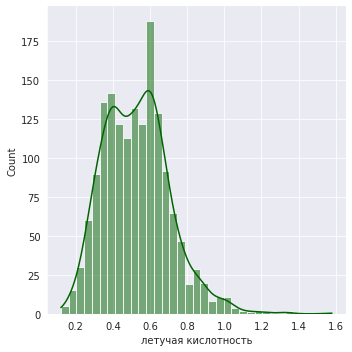

In [ ]:
sns.displot(df["летучая кислотность"], discrete = False, kde = True, color= "darkgreen")

plt.show()

**Лимонная кислота**

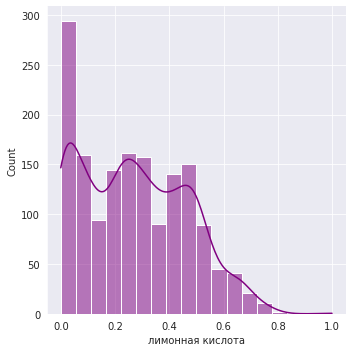

In [ ]:
sns.displot(df["лимонная кислота"], discrete = False, kde = True, color= "purple")

plt.show()

# 7 Двухмерный анализ данных

**Существуют две гипотезы**:
* Н0 - два признака независимы;
* Н1 - существует зависимость между признаками

##7.1 Сопоставление различный пар типов данных

### 7.1.1 Список признаков, основанных на типе

In [ ]:
# Проверим величину уникальности переменных
target_col_filter = df.loc[:]


cat_cols = list(set(target_col_filter.columns) - set(target_col_filter._get_numeric_data().columns))
num_cols = list(set(target_col_filter._get_numeric_data().columns))


# Получим количество уникальных записей в каждом столбце с категориальными данными
object_nunique = list(map(lambda col: target_col_filter[col].nunique(), cat_cols))
dict_features_by_col = dict(zip(cat_cols, object_nunique))


# Выведем количество уникальных записей по столбцам в порядке возрастания
print(sorted(dict_features_by_col.items(), key=lambda x: x[1]))

dichotomous_cols = [cat for cat in cat_cols if df[cat].value_counts().count() == 2]
polytomous_cols = list(set(cat_cols) - set(dichotomous_cols))


print("Categorical Columns".ljust(left_padding))
print(cat_cols)
print("--------------------")

print("Numerical Columns".ljust(left_padding))
print(num_cols)
print("--------------------")

print("Dichotomous Columns".ljust(left_padding))
print(dichotomous_cols)
print("--------------------")

print("Polytomous Columns".ljust(left_padding))
print(polytomous_cols)

[]
Categorical Columns                     
[]
--------------------
Numerical Columns                       
['сульфаты', 'хлориды', 'фиксированная кислотность', 'спирт', 'лимонная кислота', 'остаточный сахар', 'свободный диоксид серы', 'pH', 'плотность', 'общий диоксид серы', 'качество', 'летучая кислотность']
--------------------
Dichotomous Columns                     
[]
--------------------
Polytomous Columns                      
[]


**Категориальные столбцы**
> ---

**Числовые Столбцы**
> 'pH', 'качество', 'плотность', 'общий диоксид серы', 'остаточный сахар', 'лимонная кислота', 'сульфаты', 'свободный диоксид серы', 'летучая кислотность', 'хлориды', 'спирт', 'фиксированная кислотность'

**Порядковые столбцы**
> ---

**Двухкатегориальные столбцы**
> ---

**Многокатегориальные Columns**
> ---

**Вывод:** все данные имеют числовой тип данных

### 7.1.2 Числовые и числовые данные 

**Теория**

**Коэффициент ранговой корреляции Спирмена**

Она же Spearman's rho или Spearman correlation coefficient


Применяется к **Непрерывным или порядковым** переменным

<br>

Для корреляции Пирсона r обе переменные должны быть нормально распределены
Согласно тесту на нормальность, столбцы "Срок пребывания", "Ежемесячные платежи" и "Общие расходы" **распределны не нормально**

**В отличие от корреляции Пирсона**, корреляция Спирмена не предполагает, что оба набора данных **распределены нормально**

Корреляция Пирсона предполагает нормальность и линейность. Корреляция Пирсона также не может определить разницу между зависимыми и независимыми переменными

Гипотезы:

* **H0: две выборки не имеют монотонной взаимосвязи**
* **H1: существует монотонная взаимосвязь между выборками**

Ссылки:
* https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient
* https://www.statology.org/spearman-correlation-python/

Расчет корреляции для разных критериев

In [ ]:
# Функция для определения корреляции Спирмена
def cal_spearmanr(c1, c2):

    alpha = 0.05

    correlation, p_value = stats.spearmanr(df[c1], df[c2])

    print(f'{c1}, {c2} correlation: {correlation}, p: {p_value}')

    if p_value > alpha:
        print('Вероятно, у них нет монотонной взаимосвязи (не удается отклонить H0)')
    else:
        print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')

In [ ]:
# Для удобства вывожу список названий столбцов данных
df_columns_list = list(df.columns)
df_columns_list

['фиксированная кислотность',
 'летучая кислотность',
 'лимонная кислота',
 'остаточный сахар',
 'хлориды',
 'свободный диоксид серы',
 'общий диоксид серы',
 'плотность',
 'pH',
 'сульфаты',
 'спирт',
 'качество']

Так как числовых данных очень много, рассмотрю взаимосвязь между 4-мя критериями (выборочно). <br>
**Критерии**:<br>
 * Лимонная кислота
 * Остаточный сахар
 * Хлориды
 * Плотность
 * pH
 * Сульфаты
 * Спирт
 * Качество


**Лимонная кислота и pH**

In [ ]:
cal_spearmanr("лимонная кислота", "pH")

лимонная кислота, pH correlation: -0.5480262762680951, p: 5.089354413676131e-126
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)


**Хлориды и Сульфаты**

In [ ]:
cal_spearmanr("хлориды", "сульфаты")

хлориды, сульфаты correlation: 0.020825479176879692, p: 0.4052972934780398
Вероятно, у них нет монотонной взаимосвязи (не удается отклонить H0)


**Остаточный сахар и Спирт**

In [ ]:
cal_spearmanr("остаточный сахар", "спирт")

остаточный сахар, спирт correlation: 0.11654813117003865, p: 2.9718502914568935e-06
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)


**Плотность и Качество**

In [ ]:
cal_spearmanr("плотность", "качество")

плотность, качество correlation: -0.17707406597199962, p: 9.918139164678968e-13
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)


**Вывод**: Почти все пары имеют монотонную зависимость, за исключением Хлоридов и Сульфатов.

##7.2 Коллинеарность

**Теория по коллинеарности**

Для категориальных переменных мультиколлинеарность может быть обнаружена с помощью **коэффициента ранговой корреляции Спирмена** (порядковые переменные) и **критерия chi-square** (номинальные переменные)

ρ Спирмена уже был выполнен в предыдущем разделе, который может быть использован в качестве меры коллинеарности

Вот почему давайте просто перейдем к **chi-square**


### 7.2.1 Chi-Square

**Функция** для определения **критерия chi-square**

In [ ]:
def calculate_chi_square(feature1, feature2):
    print(f"Корреляция между {text.BOLD}{feature1}{text.END} and {text.BOLD}{feature2}{text.END}")
    crosstab = pd.crosstab(df[feature1], df[feature2])
    # display(crosstab)
    stat, p, dof, expected = stats.chi2_contingency(crosstab,correction=True)


    print(f'p-value : {p}, degree of freedom: {dof}')

    # interpret test-statistic
    prob = 0.95
    critical = stats.chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

    if abs(stat) >= critical:
        print('Зависимый (отклонить H0)')
    else:
        print('Независимый (не удается отклонить H0)')

    # interpret p-value
    alpha = 1.0 - prob

    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Зависимый (отклонить H0)')
    else:
        print('Независимый (не удается отклонить H0)')
    print('-----------------------------------\n')

**Лимонная кислота и pH**

In [ ]:
calculate_chi_square('лимонная кислота','pH')

Корреляция между лимонная кислота and pH
p-value : 0.0, degree of freedom: 6952
probability=0.950, critical=7147.084, stat=12516.203
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
-----------------------------------



**Хлориды и Сульфаты**

In [ ]:
calculate_chi_square('хлориды','сульфаты')

Корреляция между хлориды and сульфаты
p-value : 0.0, degree of freedom: 14440
probability=0.950, critical=14720.661, stat=34982.451
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
-----------------------------------



**Остаточный сахар и Спирт**

In [ ]:
calculate_chi_square('остаточный сахар','спирт')

Корреляция между остаточный сахар and спирт
p-value : 0.0, degree of freedom: 5760
probability=0.950, critical=5937.674, stat=11142.771
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
-----------------------------------



**Плотность и Качество**

In [ ]:
calculate_chi_square('плотность','качество')

Корреляция между плотность and качество
p-value : 7.547139688049285e-33, degree of freedom: 2175
probability=0.950, critical=2284.611, stat=3054.487
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)
-----------------------------------



**Вывод**: каждая пара данных имеет зависимость друг от друга

##7.3 Визуализация

**Лимонная кислота и pH**

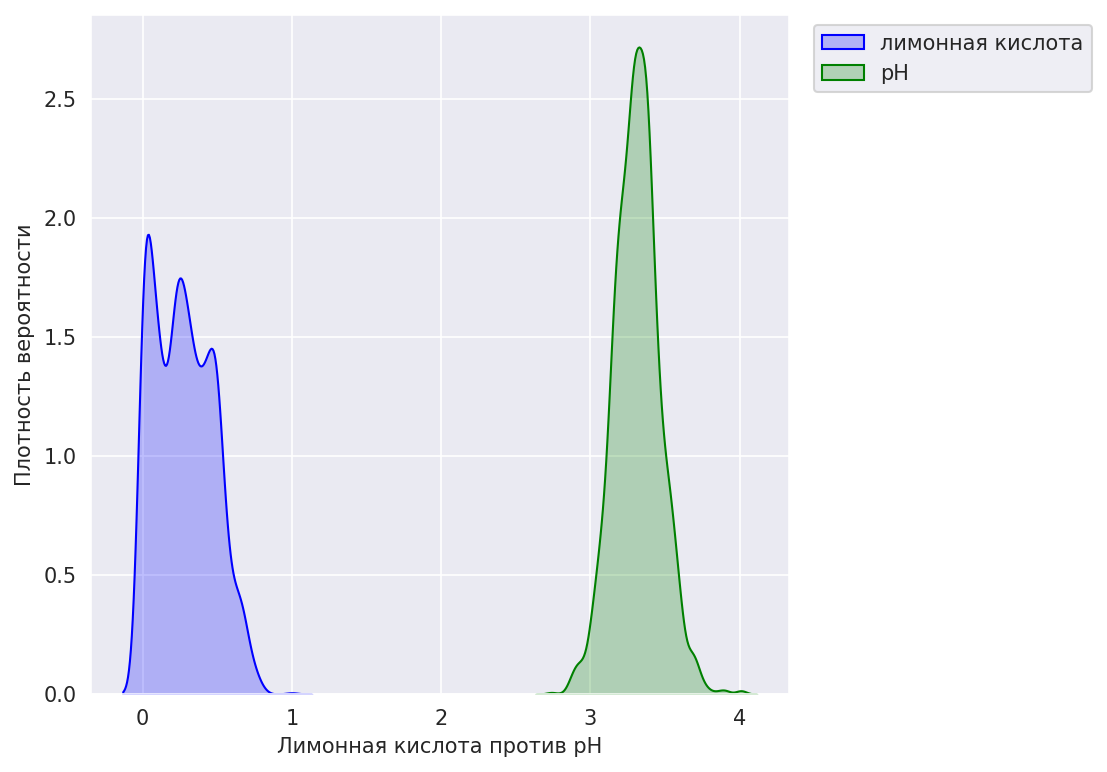

Оба критерия не имеют нормального распределения


In [ ]:
plt.figure(figsize=(6,6), dpi= 150)
sns.kdeplot(df["лимонная кислота"], color='b', shade=True, Label='лимонная кислота')
sns.kdeplot(df["pH"], color='g', shade=True, Label='pH')
  
plt.xlabel('Лимонная кислота против pH')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5, 0.45, 0.5))
plt.show()

print(f"{text.BOLD}Оба критерия не имеют нормального распределения{text.END}")

**Хлориды и Сульфаты**

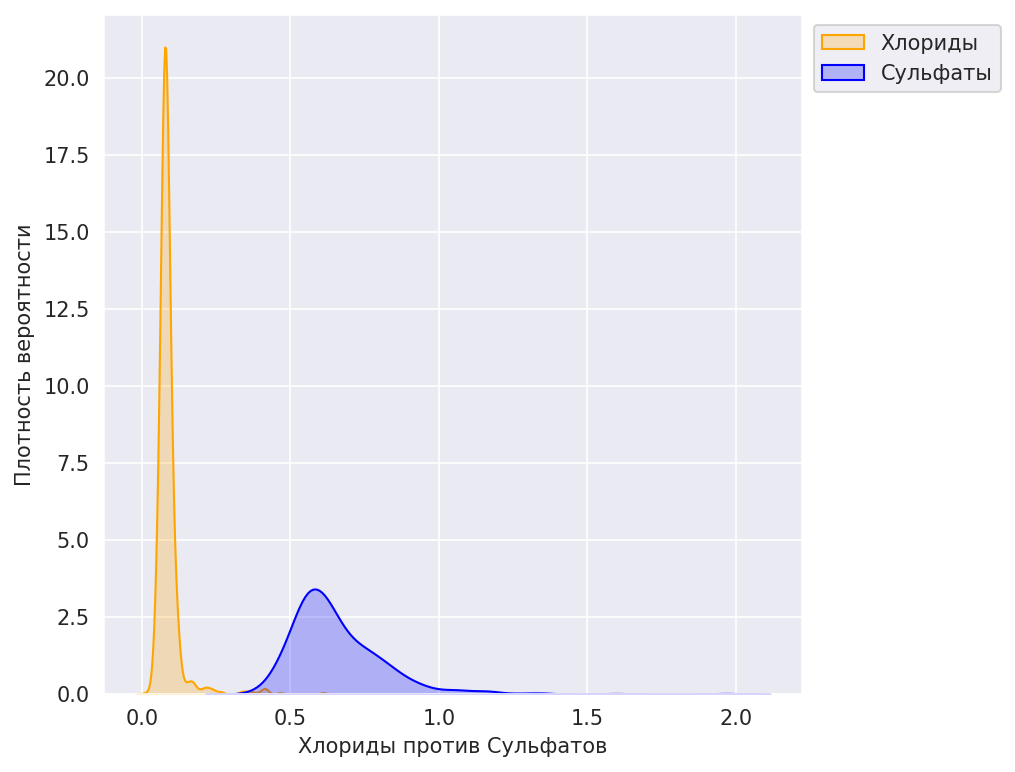

Хлориды не имеет нормального распределения, а вот сульфаты более менее распределяются нормально 
Причем распределение хлоридов очень сильно скачет, что не есть хорошо.


In [ ]:
plt.figure(figsize=(6,6), dpi= 150)
sns.kdeplot(df["хлориды"], color='orange', shade=True, Label='Хлориды')
sns.kdeplot(df["сульфаты"], color='b', shade=True, Label='Сульфаты')
  
plt.xlabel('Хлориды против Сульфатов')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5, 0.3, 0.5))
plt.show()

print(f"{text.BOLD}Хлориды не имеет нормального распределения, а вот сульфаты более менее распределяются нормально{text.END} \
\nПричем распределение хлоридов очень сильно скачет, что не есть хорошо.")

**Остаточный сахар и Спирт**

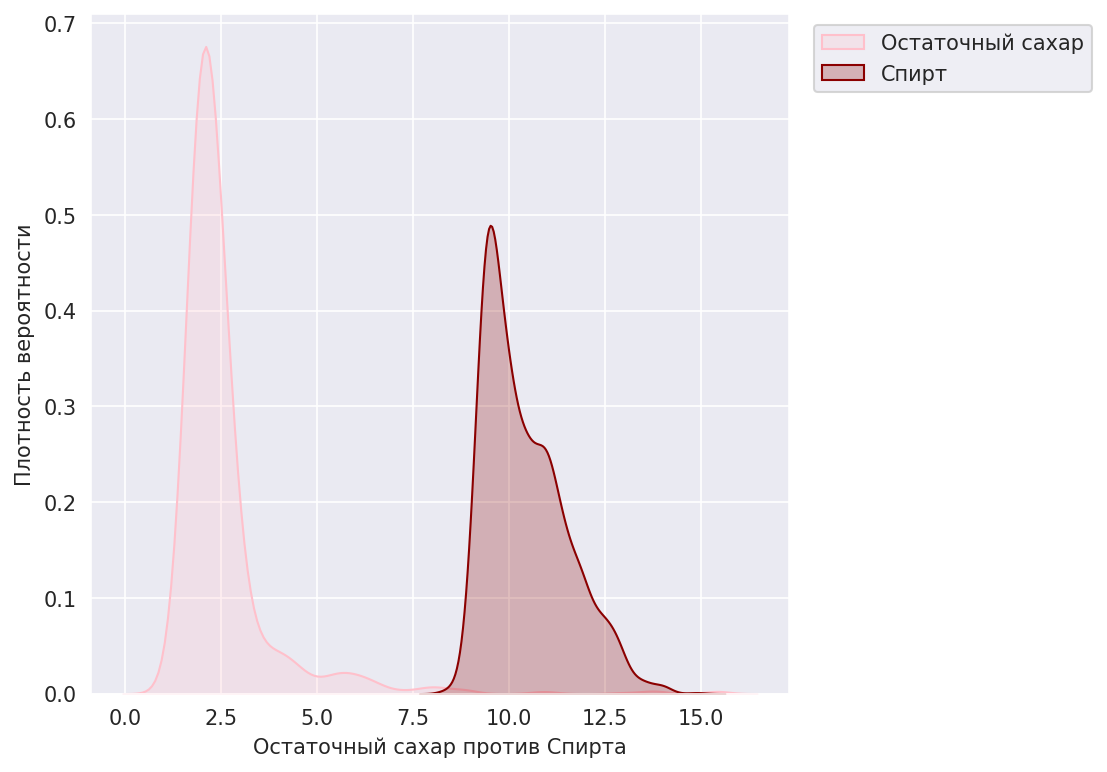

По распределению видно, что критерии имеют положительную корреляцию. И связанны монотонно.


In [ ]:
plt.figure(figsize=(6,6), dpi= 150)
sns.kdeplot(df["остаточный сахар"], color='pink', shade=True, Label='Остаточный сахар')
sns.kdeplot(df["спирт"], color='darkred', shade=True, Label='Спирт')
  
plt.xlabel('Остаточный сахар против Спирта')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5, 0.45, 0.5))
plt.show()

print(f"{text.BOLD}По распределению видно, что критерии имеют положительную корреляцию. И связанны монотонно.{text.END}")

# 8 Многомерный анализ данных

## 8.1 Мультиколлинеарность (Критерий Краскела — Уоллиса)

**Теория** <br>
Мультиколлинеарность (Критерий Краскела — Уоллиса) <br><br>
Для категориальной и непрерывной переменных мультиколлинеарность может быть измерена с помощью **t-критерия** (если категориальная переменная имеет 2 категории, параметрическая) или **ANOVA** (более 2 категорий, параметрическая)

**Критерий Краскела — Уоллиса** чаще используется, когда у нас есть **три или более уровня размерность**. Для двух уровней размерность подходит **U-тест Манна Уитни**

*Параметрическим эквивалентом критерия Краскела-Уоллиса** является односторонний дисперсионный анализ (ANOVA).

Гипотезы:

* H0: Все распределения выборок равны.
* H1: Одна или несколько распределений выборок не равны.

Ссылки:
* https://ru.wikipedia.org/wiki/Критерий_Краскела_—_Уоллиса
* https://www.codecamp.ru/blog/kruskal-wallis-test-python/

**Важно!!!**<br>
Многомерный анализ провожу на данных:<br>
**1-ый опыт:**
* Фиксированная кислотность
* pH
* Спирт

**2-ой опыт:**
* Летучая кислотность
* Сульфаты
* Плотность

In [ ]:
# compare samples
stat, p = stats.kruskal(df['фиксированная кислотность'], df['pH'], df['спирт'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковое распределение (не удается отклонить H0)')
else:
    print('Различные распределения (отклонить H0)')

Statistics=3729.985, p=0.000
Различные распределения (отклонить H0)


In [ ]:
# compare samples
stat, p = stats.kruskal(df['летучая кислотность'], df['сульфаты'], df["плотность"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковое распределение (не удается отклонить H0)')
else:
    print('Различные распределения (отклонить H0)')

Statistics=3084.069, p=0.000
Различные распределения (отклонить H0)


## 8.2 Многомерная визуализация

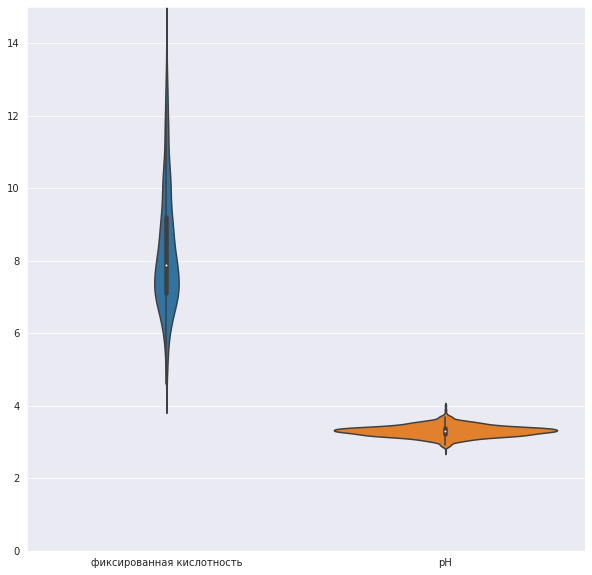

In [ ]:
plt.figure(figsize=(10,10))
plt.axis([0, 10, 0, 15])
plt.xlabel = 'value of acid'
plt.ylabel = 'density'
sns.violinplot(data=df[["фиксированная кислотность", "pH"]])

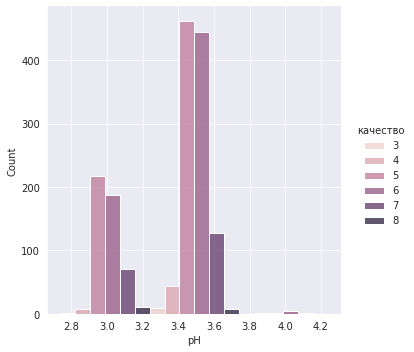

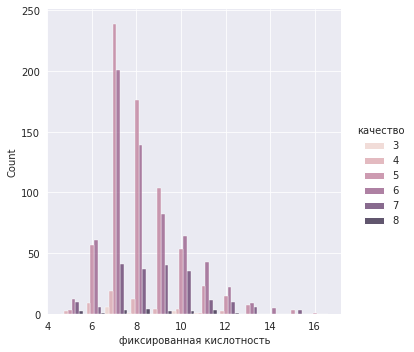

In [ ]:
fig1 = sns.displot(x = "pH", data=df, multiple= 'dodge', hue= "качество", bins = 100, binwidth= 0.5)
fig2 = sns.displot(x = "фиксированная кислотность", data=df, multiple= 'dodge', hue= "качество", bins = 100, binwidth= 1)

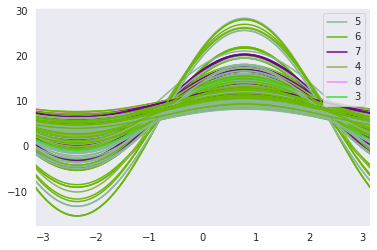

In [ ]:
pd.plotting.andrews_curves(df[["спирт", "качество", "остаточный сахар"]], 'качество')

# 9 Итоговые выводы

Из приведенного выше анализа мы можем сделать вывод:
* Все **данные** числового типа и **не имеют гауссово распределение**
* Самая **высокая** положительная **корреляция** между **остаточным сахаром** и **спиртом**, тем самым чем больше сахара в вине, тем крепче оно будет
* Из многомерного анализа можно предположить, что для **наилучшего качества** кислотность вина должна быть в районе **3,4-3,5 pH**
* Из многомерного анализа можно также принять, что для достижения лучшего качества **фиксированная кислотность** должна находиться в раойне **8**
* Исходя из последнего графика в 8.2 можно также с уверенностью сказать, что чаще всего можно получить вино среднего качества, из этого упор следует делать на  регулирование содержание **сахара** и **спирта** для достижения **лучшего качества**